## Effect of tangible features on pricing of mobile phones and comparison of ML algorithms

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report




In [8]:
train_ds = pd.read_csv('M:\\Master DU\\4- Business Intelligence\\archive\\train.csv')

In [9]:
train_ds.describe

<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_w

In [10]:
train_ds.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
train_ds.head().transpose()

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [12]:
train_ds.shape

(2000, 21)

In [13]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [14]:
train_ds.notnull().sum()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [15]:
#Price range groups

train_ds['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [16]:
# no. of observations in each price group
pr = train_ds["price_range"].value_counts()
pr

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [17]:
ram_count = train_ds.groupby('ram')['price_range'].value_counts()
ram_count

ram   price_range
256   0              1
258   0              2
259   0              1
262   0              1
263   0              1
                    ..
3990  3              1
3991  3              2
3993  3              1
3996  3              1
3998  3              1
Name: price_range, Length: 1700, dtype: int64

### Descriptive Statistics

In [18]:
round(train_ds.describe().transpose(), 2)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.52,439.42,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.50,0.50,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52,0.82,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.51,0.50,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.31,4.34,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52,0.50,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.05,18.15,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50,0.29,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.25,35.40,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52,2.29,1.0,3.00,4.0,7.00,8.0


### Relationship between price and different features

### RAM

<AxesSubplot:xlabel='ram', ylabel='Count'>

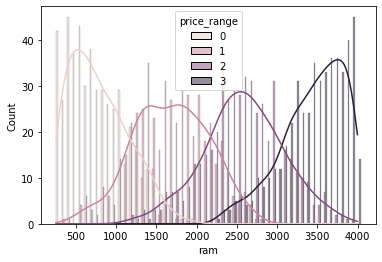

In [19]:
ax = sns.histplot(train_ds , x = 'ram' , hue = 'price_range' , kde = True, binwidth=70, multiple="dodge")
#ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax

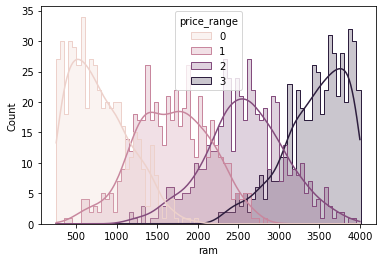

In [20]:
sns.histplot(train_ds , x = 'ram' , hue = 'price_range' , kde = True, binwidth=50, element = 'step')
plt.show()

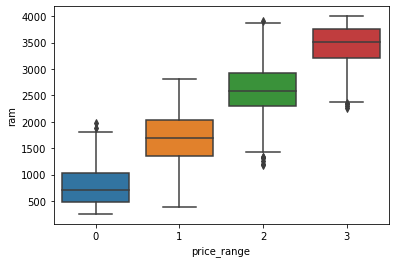

In [21]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'ram')
plt.show()

### Internal Memory

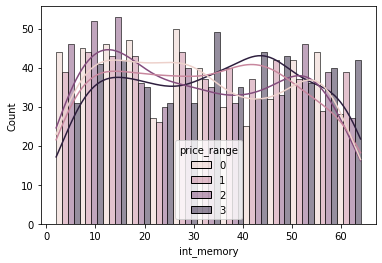

In [22]:
sns.histplot(train_ds , x = 'int_memory' , hue = 'price_range' , kde = True, multiple = 'dodge')
plt.show()

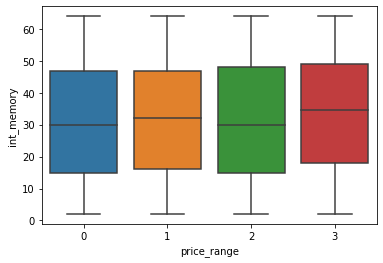

In [23]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'int_memory')
plt.show()

### Bluetooth

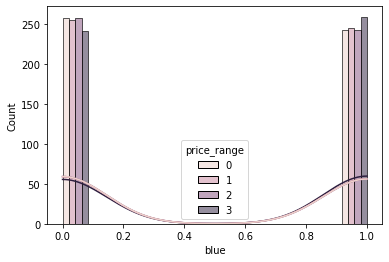

In [24]:
sns.histplot(train_ds , x = 'blue' , hue = 'price_range' , kde = True, multiple = 'dodge')
plt.show()

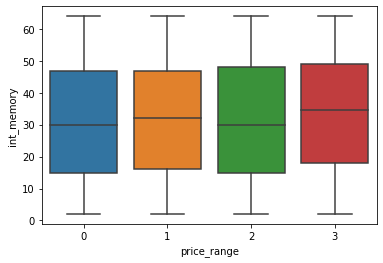

In [25]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'int_memory')
plt.show()

### Mobile Weight

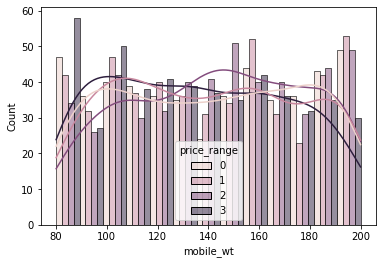

In [26]:
sns.histplot(train_ds , x = 'mobile_wt' , hue = 'price_range' , kde = True, multiple = 'dodge')
plt.show()

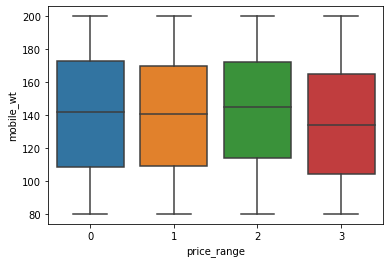

In [27]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'mobile_wt')
plt.show()

### No. of Cores

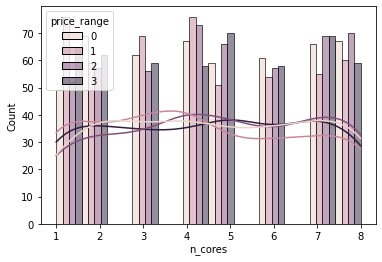

In [28]:
sns.histplot(train_ds , x = 'n_cores' , hue = 'price_range' , kde = True, multiple = 'dodge')
plt.show()

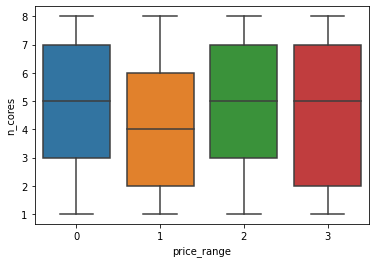

In [29]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'n_cores')
plt.show()

### Dual Sim

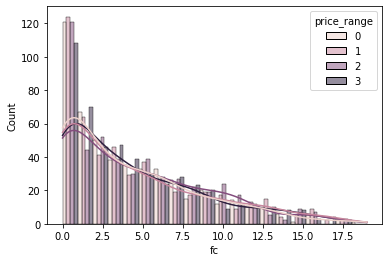

In [30]:
sns.histplot(train_ds , x = 'fc' , hue = 'price_range' , kde = True, multiple = 'dodge')
plt.show()

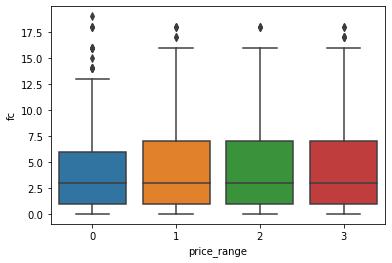

In [31]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'fc')
plt.show()

### Four G

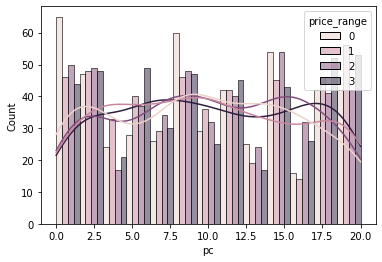

In [32]:
sns.histplot(train_ds , x = 'pc' , hue = 'price_range' , kde = True, multiple = 'dodge')
plt.show()

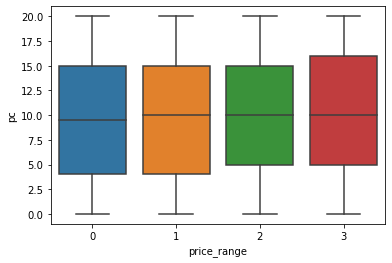

In [33]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'pc')
plt.show()

### Screen Height

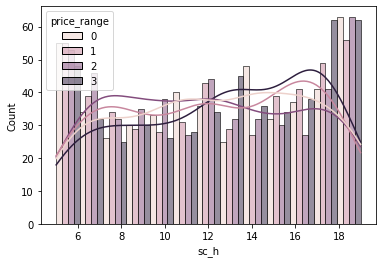

In [34]:
sns.histplot(train_ds , x = 'sc_h' , hue = 'price_range' , kde = True, multiple = 'dodge')
plt.show()

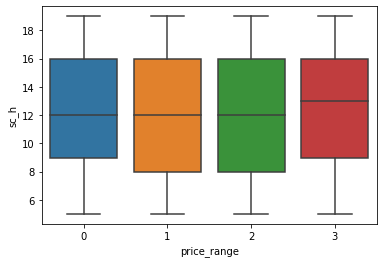

In [35]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'sc_h')
plt.show()

### Screen Width

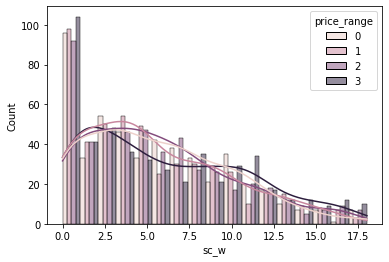

In [36]:
sns.histplot(train_ds , x = 'sc_w' , hue = 'price_range' , kde = True, multiple = 'dodge')
plt.show()

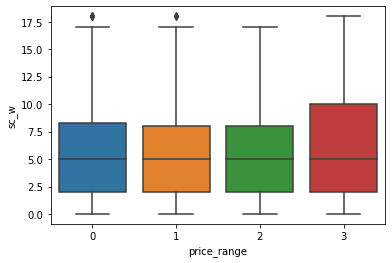

In [37]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'sc_w')
plt.show()

### Battery Power

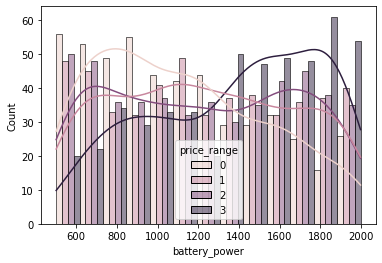

In [38]:
sns.histplot(train_ds , x = 'battery_power' , hue = 'price_range' , kde = True, multiple = 'dodge')
plt.show()

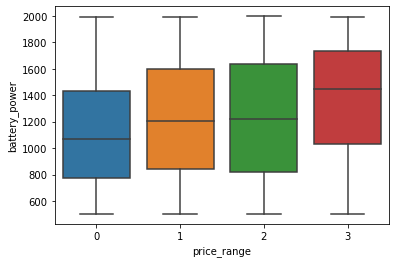

In [39]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'battery_power')
plt.show()

### Phone Height

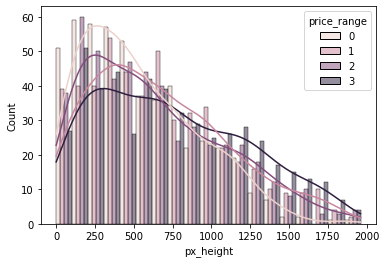

In [40]:
sns.histplot(train_ds , x = 'px_height' , hue = 'price_range' , kde = True, multiple = 'dodge')
plt.show()

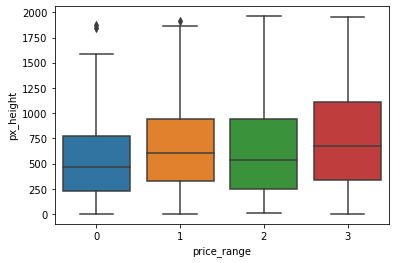

In [41]:
sns.boxplot(data = train_ds, x = 'price_range' , y = 'px_height')
plt.show()

### Correlation Matrix

In [42]:
corr = round(train_ds.corr(), 2)
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.00,0.01,0.01,-0.04,0.03,0.02,-0.00,0.03,0.00,-0.03,...,0.01,-0.01,-0.00,-0.03,-0.02,0.05,0.01,-0.01,-0.01,0.20
blue,0.01,1.00,0.02,0.04,0.00,0.01,0.04,0.00,-0.01,0.04,...,-0.01,-0.04,0.03,-0.00,0.00,0.01,-0.03,0.01,-0.02,0.02
clock_speed,0.01,0.02,1.00,-0.00,-0.00,-0.04,0.01,-0.01,0.01,-0.01,...,-0.01,-0.01,0.00,-0.03,-0.01,-0.01,-0.05,0.02,-0.02,-0.01
dual_sim,-0.04,0.04,-0.00,1.00,-0.03,0.00,-0.02,-0.02,-0.01,-0.02,...,-0.02,0.01,0.04,-0.01,-0.02,-0.04,-0.01,-0.02,0.02,0.02
fc,0.03,0.00,-0.00,-0.03,1.00,-0.02,-0.03,-0.00,0.02,-0.01,...,-0.01,-0.01,0.02,-0.01,-0.01,-0.01,0.00,-0.01,0.02,0.02
four_g,0.02,0.01,-0.04,0.00,-0.02,1.00,0.01,-0.00,-0.02,-0.03,...,-0.02,0.01,0.01,0.03,0.04,-0.05,0.58,0.02,-0.02,0.01
int_memory,-0.00,0.04,0.01,-0.02,-0.03,0.01,1.00,0.01,-0.03,-0.03,...,0.01,-0.01,0.03,0.04,0.01,-0.00,-0.01,-0.03,0.01,0.04
m_dep,0.03,0.00,-0.01,-0.02,-0.00,-0.00,0.01,1.00,0.02,-0.00,...,0.03,0.02,-0.01,-0.03,-0.02,0.02,-0.01,-0.00,-0.03,0.00
mobile_wt,0.00,-0.01,0.01,-0.01,0.02,-0.02,-0.03,0.02,1.00,-0.02,...,0.00,0.00,-0.00,-0.03,-0.02,0.01,0.00,-0.01,-0.00,-0.03
n_cores,-0.03,0.04,-0.01,-0.02,-0.01,-0.03,-0.03,-0.00,-0.02,1.00,...,-0.01,0.02,0.00,-0.00,0.03,0.01,-0.01,0.02,-0.01,0.00


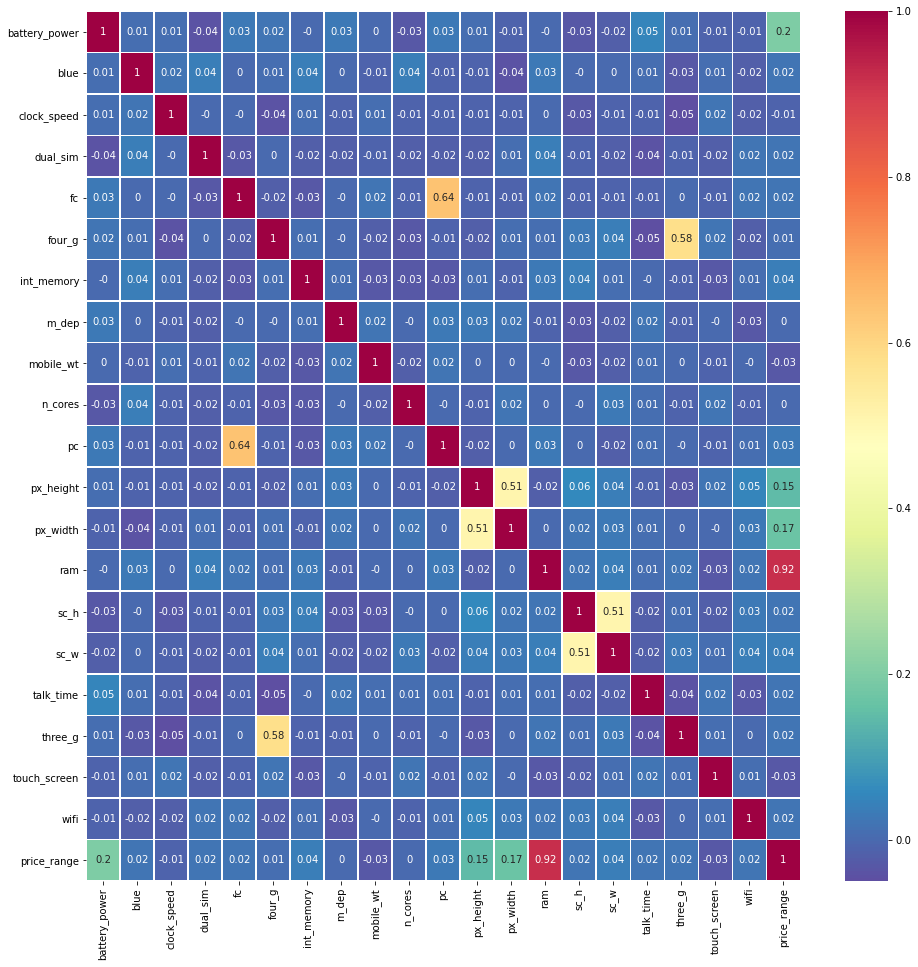

In [43]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr, annot=True, cmap="Spectral_r", linewidths=.5)
plt.show()

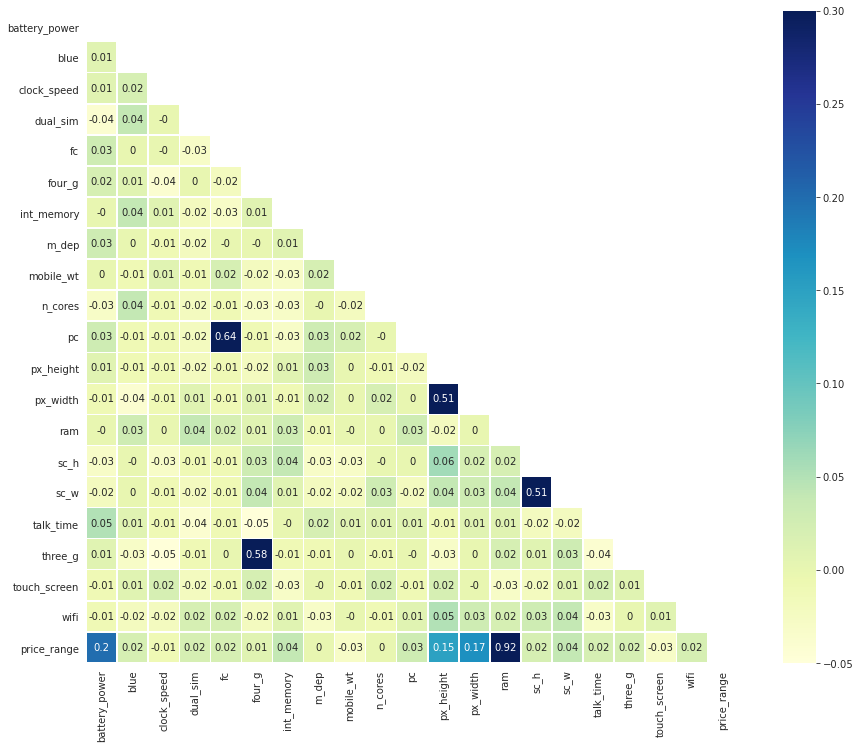

In [44]:
#cor_mat = np.corrcoef(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap="YlGnBu", linewidths=.5)

## Predictions

In [45]:
#Spliting the data into train and test
X = train_ds.iloc[:,0:20].values
Y = train_ds.iloc[:, 20].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [46]:
std_sc = StandardScaler()
X_train = std_sc.fit_transform(X_train)
X_test = std_sc.transform(X_test)

### Logistic Regression

In [47]:
lrclass = LogisticRegression(random_state = 42)

lrclass.fit(X_train,Y_train)

Y_pred = lrclass.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       132
           1       0.92      0.98      0.95       118
           2       0.99      0.91      0.95       120
           3       0.96      0.99      0.97       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



Feature: 0, Score: -2.66339
Feature: 1, Score: 0.00502
Feature: 2, Score: 0.11634
Feature: 3, Score: 0.09819
Feature: 4, Score: -0.08788
Feature: 5, Score: -0.02158
Feature: 6, Score: -0.18835
Feature: 7, Score: 0.05102
Feature: 8, Score: 0.41740
Feature: 9, Score: -0.06589
Feature: 10, Score: 0.02913
Feature: 11, Score: -1.62175
Feature: 12, Score: -1.44026
Feature: 13, Score: -10.61019
Feature: 14, Score: -0.02772
Feature: 15, Score: -0.03955
Feature: 16, Score: -0.02893
Feature: 17, Score: -0.05381
Feature: 18, Score: 0.07948
Feature: 19, Score: 0.06433


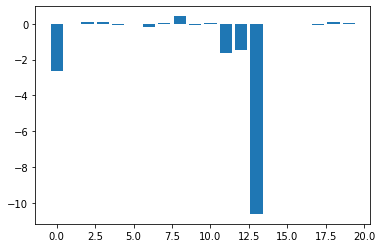

In [56]:
importance = lrclass.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


### Random Forest

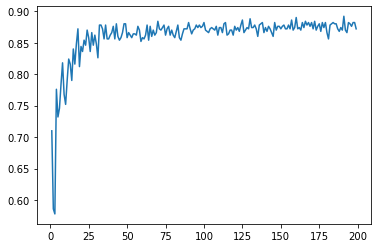

In [48]:
# to find out optimal number of n_estimators
scores =[]
for k in range(1, 200):
    rf_class = RandomForestClassifier(n_estimators=k)
    rf_class.fit(X_train, Y_train)
    Y_pred = rf_class.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))

plt.plot(range(1, 200), scores)



In [49]:
rfclass = RandomForestClassifier(n_estimators = 70)

rfclass.fit(X_train,Y_train)

Y_pred = rfclass.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       132
           1       0.80      0.84      0.82       118
           2       0.79      0.79      0.79       120
           3       0.93      0.88      0.91       130

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.87      0.86      0.86       500



Feature: 0, Score: 0.07459
Feature: 1, Score: 0.00762
Feature: 2, Score: 0.03034
Feature: 3, Score: 0.00659
Feature: 4, Score: 0.02589
Feature: 5, Score: 0.00696
Feature: 6, Score: 0.04077
Feature: 7, Score: 0.02693
Feature: 8, Score: 0.04421
Feature: 9, Score: 0.02212
Feature: 10, Score: 0.02895
Feature: 11, Score: 0.05839
Feature: 12, Score: 0.05805
Feature: 13, Score: 0.46087
Feature: 14, Score: 0.02769
Feature: 15, Score: 0.02878
Feature: 16, Score: 0.03073
Feature: 17, Score: 0.00679
Feature: 18, Score: 0.00753
Feature: 19, Score: 0.00619


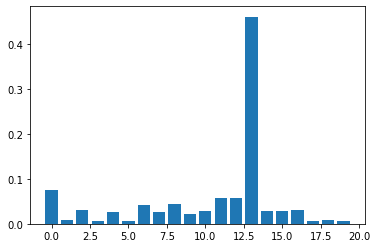

In [58]:
importance = rfclass.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Decision Tree

In [50]:
dtclass = DecisionTreeClassifier()

dtclass.fit(X_train,Y_train)

Y_pred = dtclass.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       132
           1       0.75      0.79      0.77       118
           2       0.78      0.72      0.75       120
           3       0.87      0.90      0.89       130

    accuracy                           0.83       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.83      0.83      0.83       500



Feature: 0, Score: 0.13874
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00796
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00399
Feature: 5, Score: 0.00089
Feature: 6, Score: 0.01176
Feature: 7, Score: 0.00865
Feature: 8, Score: 0.02200
Feature: 9, Score: 0.00842
Feature: 10, Score: 0.00624
Feature: 11, Score: 0.09232
Feature: 12, Score: 0.06198
Feature: 13, Score: 0.61839
Feature: 14, Score: 0.00390
Feature: 15, Score: 0.00295
Feature: 16, Score: 0.01005
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00089
Feature: 19, Score: 0.00089


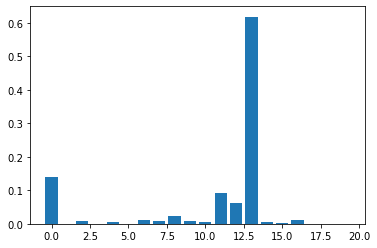

In [57]:
importance = dtclass.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()